In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [27]:
# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [122]:
# Load data từ file csv
data = pd.read_csv('data.csv')
# N, d = data.shape
# x1 = data[:, 0:d-1].reshape(-1, d-1)
# y = data[:, 2].reshape(-1, 1)
# # pd.read_csv('data.csv')
# N, d
x1 = data['X_1']
x2 = data['X_2']
x = data[['X_1', 'X_2']].T
y = data['y ']
data[['X_1', 'X_2', 'y ']]

,X_1,X_2,y
0,-0.869144,0.389310,0.0
1,-0.993467,-0.610591,0.0
2,-0.834064,0.239236,0.0
3,-0.136471,0.632003,1.0
4,0.403887,0.310784,1.0
...,...,...,...
95,0.531635,-0.479185,1.0
96,-0.650192,0.655303,1.0
97,0.985299,0.118333,1.0
98,-0.275289,0.005730,1.0


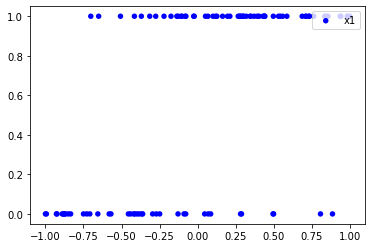

In [123]:
plt.scatter(x1, y, c='blue', edgecolors='none', s=30, label='x1')
plt.legend(loc=1)

In [124]:
alpha = 0.006
iterations = 5000

In [138]:
def y_hat(w,x,b):
    return np.dot(w.T, x) + b

[2.24770815 2.03745445] 0.4597326424546947
[2.56465258 2.35388449] 0.4976055102007573
[2.0162258  1.79923799] 0.43875659130198297
[2.31996256 1.96572586] 0.46347223397050147
[[2.24770815 2.03745445]
 [2.56465258 2.35388449]
 [2.0162258  1.79923799]
 [2.31996256 1.96572586]] [0.45973264 0.49760551 0.43875659 0.46347223]


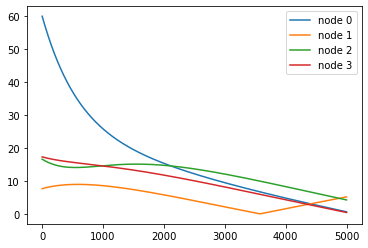

In [145]:
m = x.shape[1]
b = 0
w = np.zeros(x.shape[0])

# First layer
W = []
B = []
init_w_1 = np.array([0, 0])
init_w_2 = np.array([1, 1])
init_w_3 = np.array([-1, -1])
init_w_4 = np.array([0.5, -0.5])
for node in range(0, 4):
    if node == 0:
        w = init_w_1
    if node == 1:
        w = init_w_2
    if node == 2:
        w = init_w_3
    if node == 3:
        w = init_w_4
    loss = []
    for i in range(0, iterations):
        z = np.dot(w.T, x) + b
        a = sigmoid(z)
        dz = a - y
        dw = (1 / m) * np.dot(x, dz.T)
        db = (1 / m) * np.sum(dz)

        w = w - alpha * dw
        b = b - alpha * db
        predictions = y_hat(w.T, x, b)
        error = np.absolute(np.sum(predictions - y))
        loss.append(error)
    print(w, b)
    plt.plot(loss, label="node {}".format(node))
    W.append(w)
    B.append(b)
W = np.array(W)
B = np.array(B)
print(W, B)
plt.legend()


[0.45973264 0.49760551 0.43875659 0.46347223]
[-0.13036454 -0.11278067] [0.39135701 0.42922988 0.37038096 0.39509661]


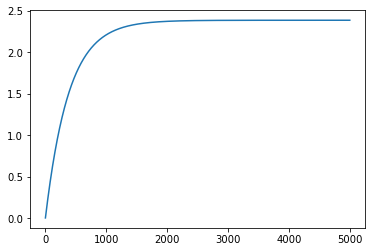

In [159]:
alpha_2 = 0.001
# Second layer
w_2 = np.zeros(x.shape[0])
x_2 = W.T
b_2 = B
y_2 = y_hat(w_2, x_2, b_2)
m_2 = x_2.shape[1]
loss = []
for i in range(0, iterations):
    z = np.dot(w_2.T, x_2) + b_2
    a = sigmoid(z)
    dz = a - y_2
    dw = (1 / m_2) * np.dot(x_2, dz.T)
    db = (1 / m_2) * np.sum(dz)
    w_2 = w_2 - alpha_2 * dw
    b_2 = b_2 - alpha_2 * db
    
    predictions = y_hat(w_2.T,x_2,b_2)
    error = np.absolute(np.sum(predictions - y_2))
    loss.append(error)
print(w_2, b_2)
plt.plot(loss)

In [158]:
x_test = np.array([0.281860, 0.726376])
y_hat(w_2, x_test, b_2)

array([0.27269129, 0.31056416, 0.25171524, 0.27643088])

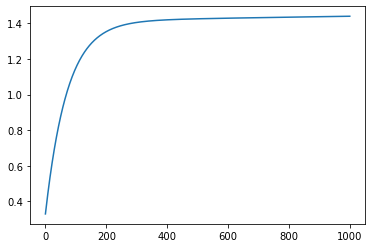

In [81]:
plt.plot(loss)